In [1]:
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dblp0 = pd.read_json('/content/drive/MyDrive/FOC/dblp-ref/dblp-ref-0.json', lines= True, chunksize=5000)
dblp0_df = pd.concat([chunk for chunk in dblp0])

In [3]:
dblp1 = pd.read_json('/content/drive/MyDrive/FOC/dblp-ref/dblp-ref-1.json', lines= True, chunksize=5000)
dblp1_df = pd.concat([chunk for chunk in dblp1])

In [4]:
dblp2 = pd.read_json('/content/drive/MyDrive/FOC/dblp-ref/dblp-ref-2.json', lines= True, chunksize=5000)
dblp2_df = pd.concat([chunk for chunk in dblp2])

In [5]:
dblp3 = pd.read_json('/content/drive/MyDrive/FOC/dblp-ref/dblp-ref-3.json', lines= True, chunksize=5000)
dblp3_df = pd.concat([chunk for chunk in dblp3])

concatenating all the 4 DataFrames


In [6]:
dblp = pd.concat([dblp0_df,dblp1_df,dblp2_df,dblp3_df])
dblp
dblp=dblp.sample(n=10000,random_state=2141997)

In [7]:
dblp_clean = dblp.copy()
dblp_clean_authors=dblp_clean.dropna(subset=['authors'])

In [8]:
n=500

Analysis 2: Known-Author graph


In [9]:
relations = dict()
for row in list(dblp_clean_authors['authors'].values):
  for author in row:
    if author not in relations:
      relations[author]=[]
    temp=row.copy()
    temp.remove(author)
    relations[author]+=temp
authors=list(relations.keys())


In [10]:
G = nx.Graph()
from networkx.classes.function import selfloop_edges
edges=[]
for i in list(relations.keys())[:n]:
  for j in relations[i]:
    edges.append([i,j])

for edge in edges:
  G.add_edge(edge[0],edge[1])
G.remove_edges_from(nx.selfloop_edges(G))

Finding the cliques

In [11]:
import itertools
def find_cliques_size_k(G, k):
  count = 0
  for clique in nx.find_cliques(G):
    if len(clique) == k:
      count += 1
    elif len(clique) > k:
      count += len(list(itertools.combinations(clique, k)))
  return count

find_cliques_size_k(G,3)

683

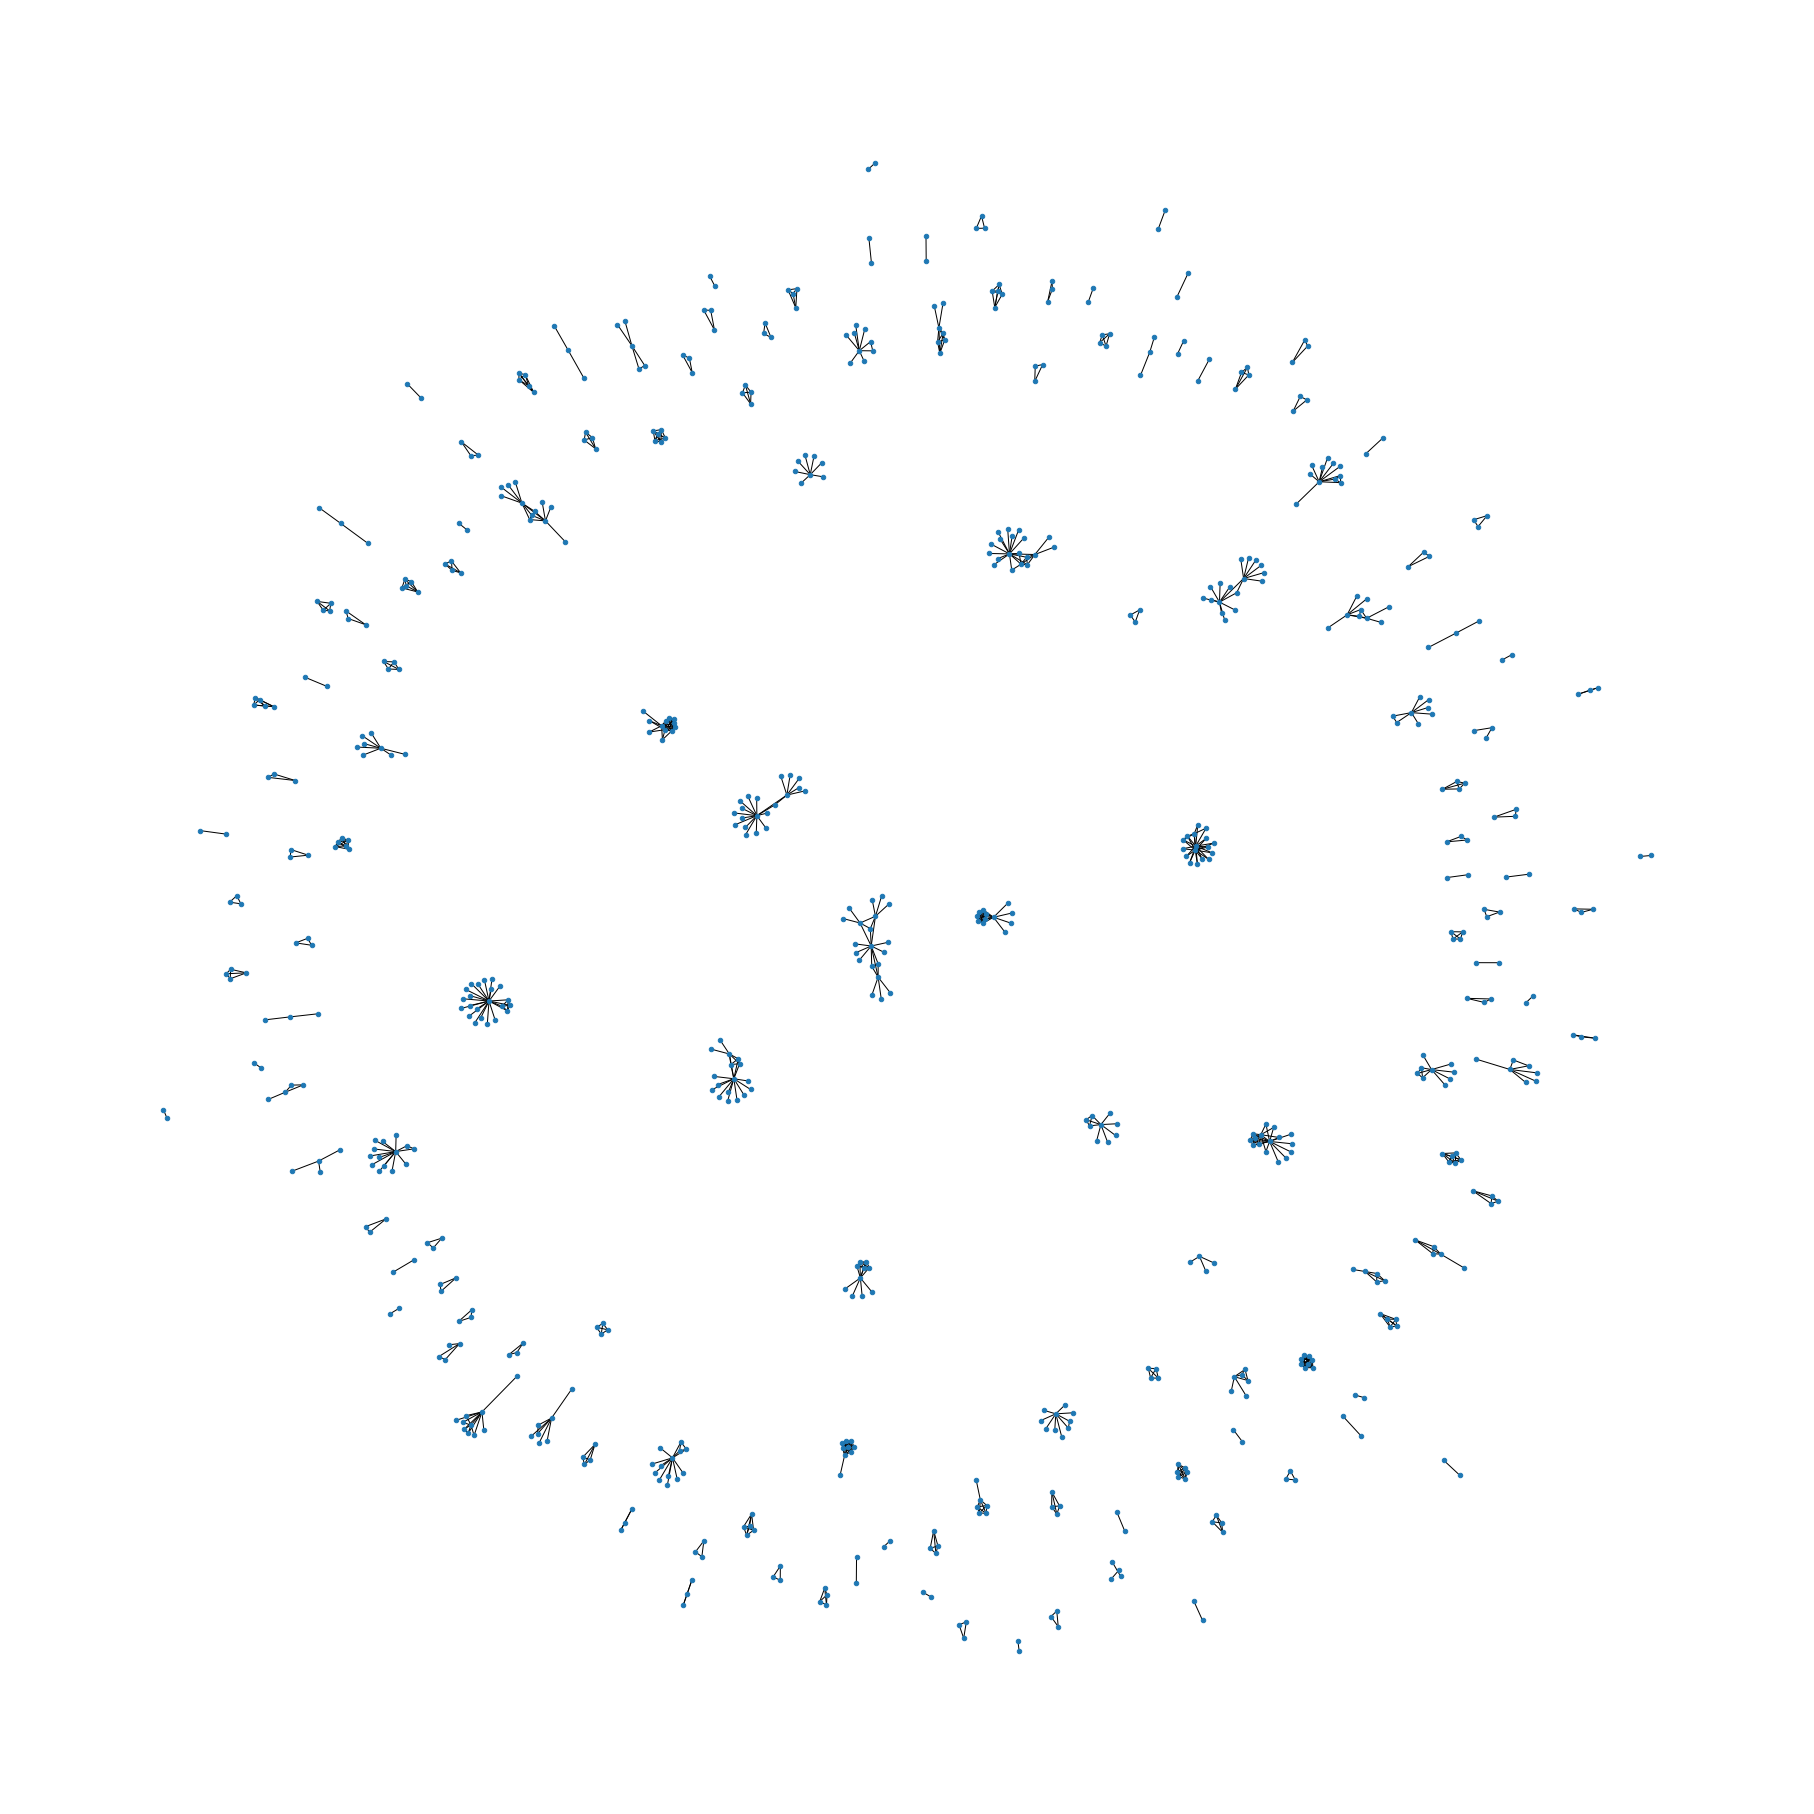

In [12]:
plt.figure(figsize=(25,25))
nx.draw(G,node_size=20)
plt.show()

In [13]:


uv=set()
for e in list(relations.keys()):
  uv.add(e)
  for j in relations[e]:
    uv.add(j)
uv=list(uv)
edd=[]
for e in relations.keys():
  a=uv.index(e)
  for j in relations[e]:
    b=uv.index(j)
    edd.append([a,b])
with open('/content/drive/MyDrive/FOC/Graph/input/input1.txt','w',encoding='utf-8') as file:
  for e in edd:
      file.writelines(str(e[0])+','+str(e[1])+'\n')


In [14]:
dblp_ref = dblp.copy()
graph3a = (dict(dblp_ref[['id', 'references']].dropna().values))

Analysis 3a: Paper citation graph

In [15]:
X = nx.DiGraph()
from networkx.classes.function import selfloop_edges
edges=[]
for i in list(graph3a.keys())[:40]:
  for j in graph3a[i]:
    edges.append([i,j])

for edge in edges:
  X.add_edge(edge[0],edge[1])
X.remove_edges_from(nx.selfloop_edges(X))



In [16]:

uv=set()
for i in list(graph3a.keys()):
  for j in graph3a[i]:
    uv.add(i)
    uv.add(j)
uv=list(uv)


edges=[]
for i in list(graph3a.keys()):
  for j in graph3a[i]:
    edges.append([uv.index(i),uv.index(j)])
with open('/content/drive/MyDrive/FOC/Graph/input/input2.txt','w',encoding='utf-8') as file:
  for e in edges:
      file.writelines(str(e[0])+','+str(e[1])+'\n')

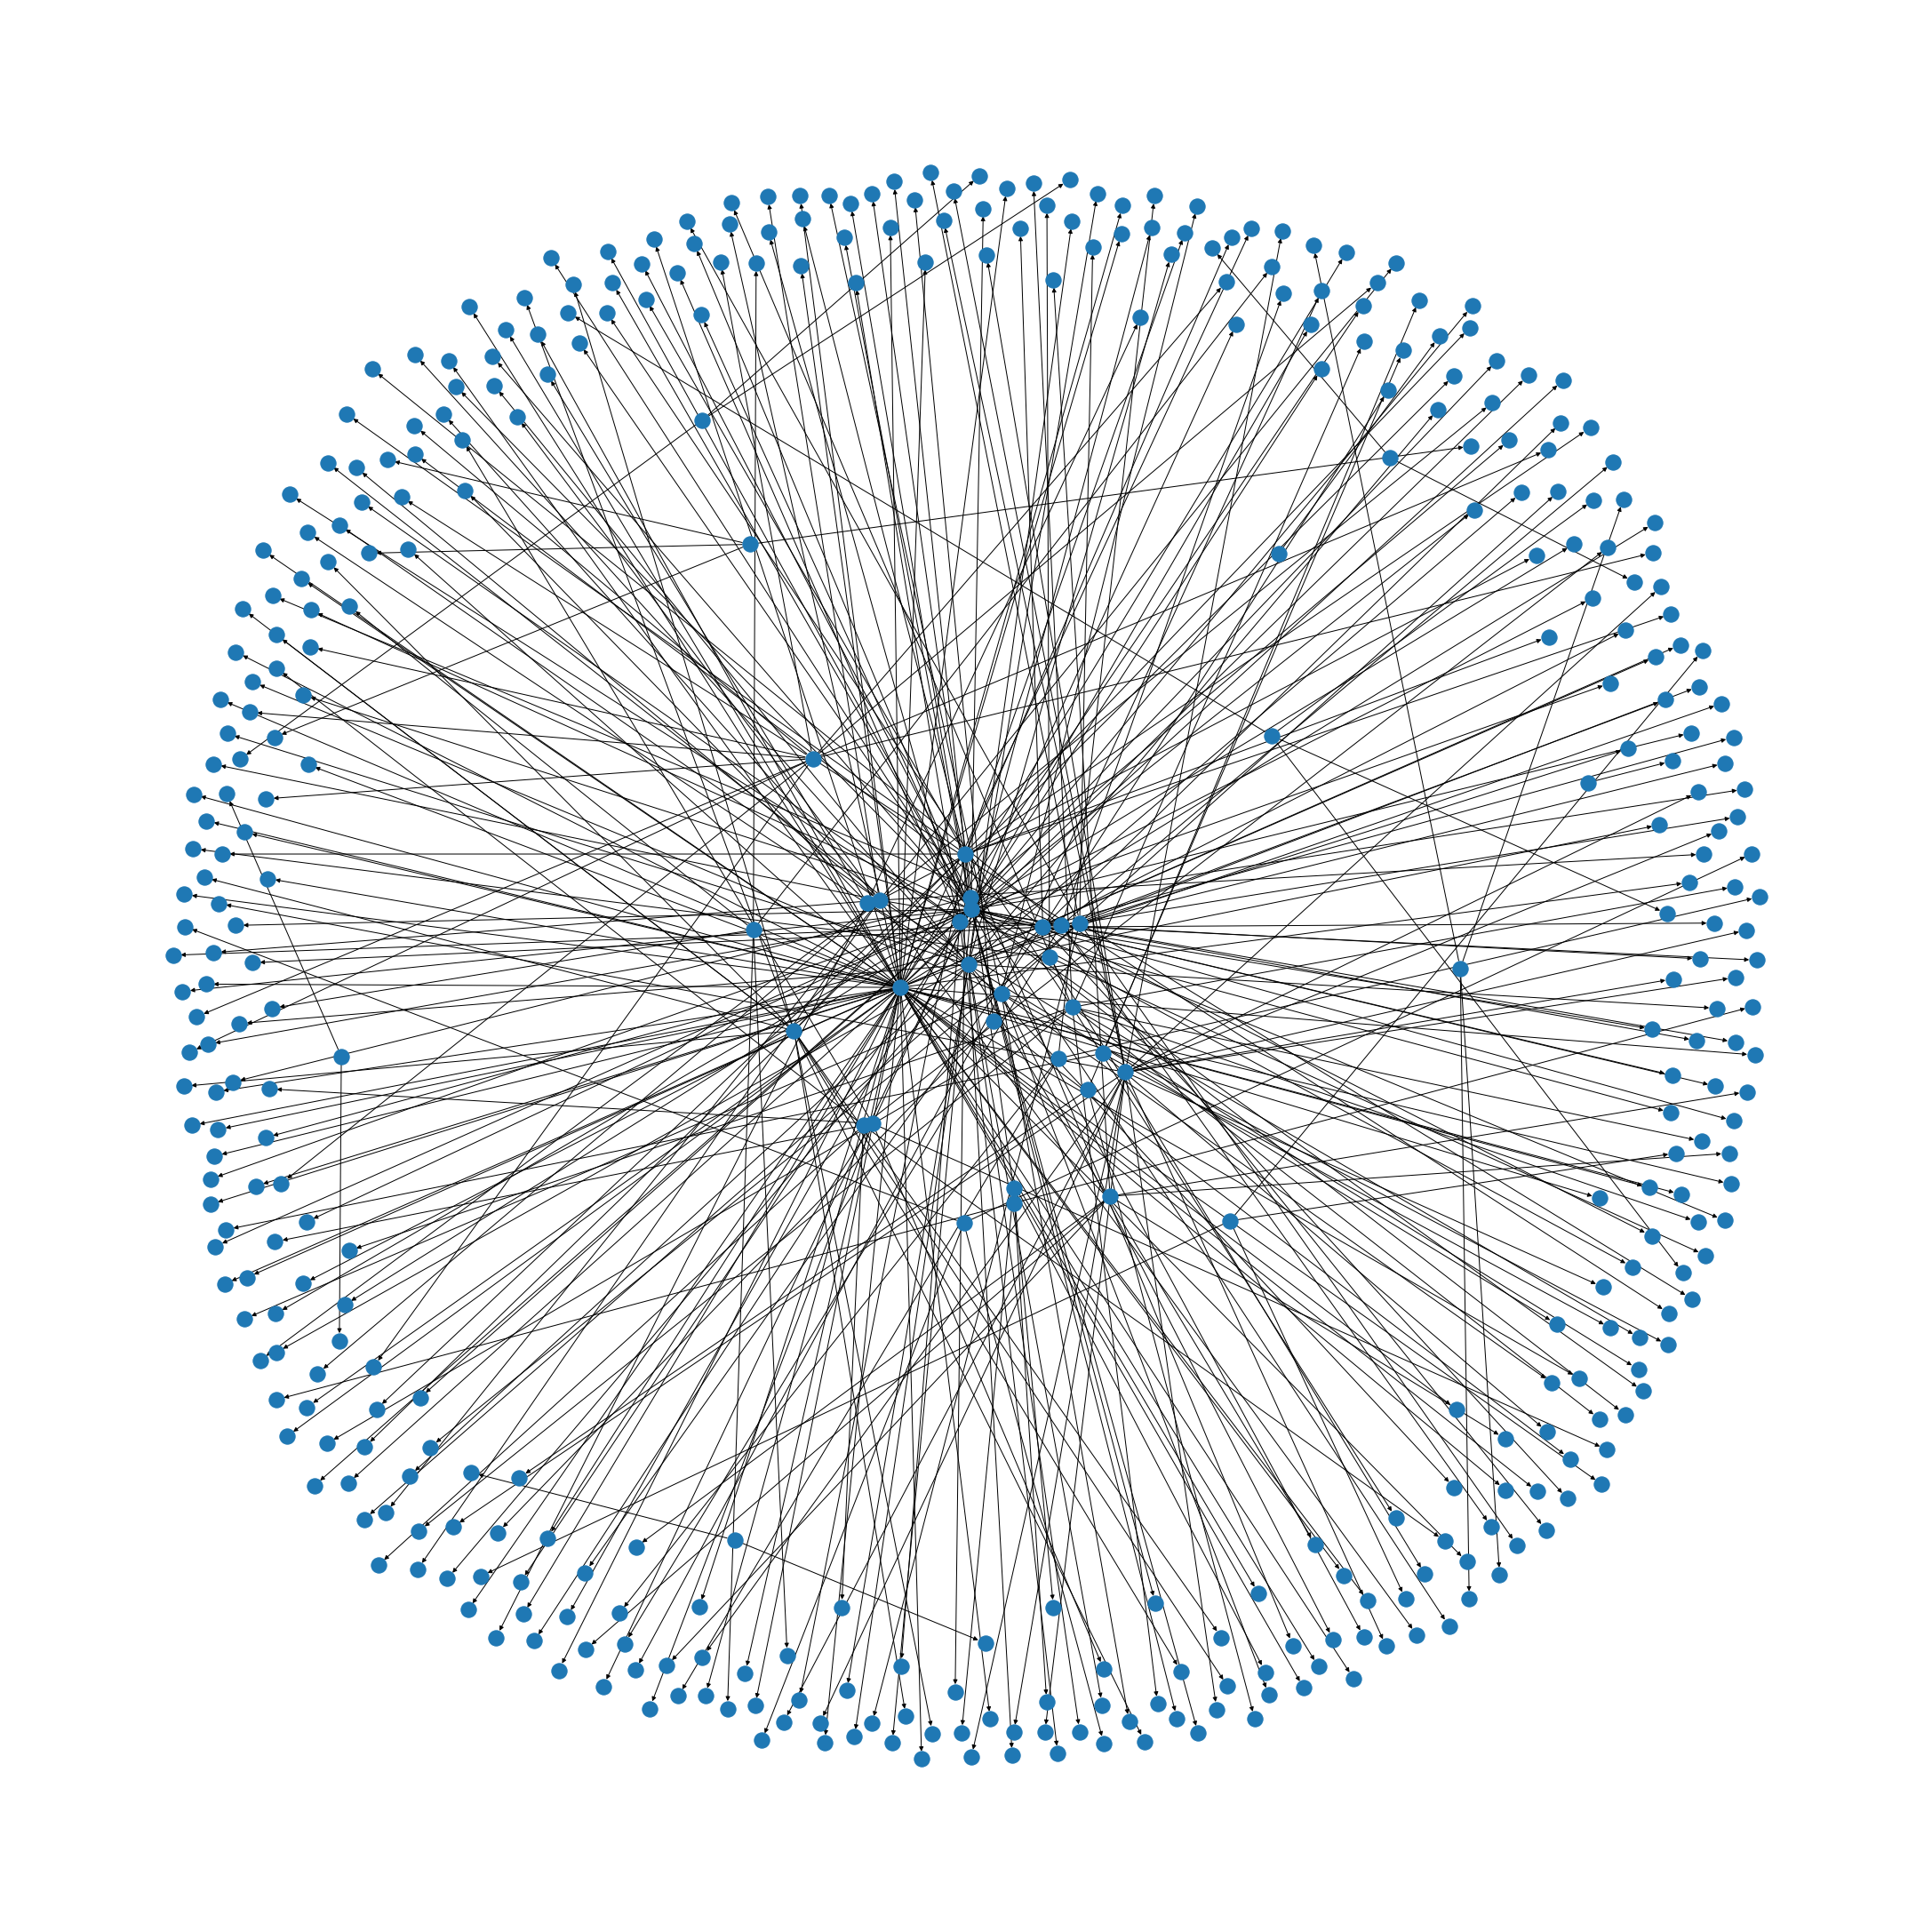

In [17]:
plt.figure(figsize=(30,30))
nx.draw(X)
plt.show()

In [18]:
dblp_venue = dblp.copy()
graph3b = (dict(dblp_venue[['venue', 'authors']].dropna().values))
del graph3b['']

Analysis 3b: Author-Venue graph

In [19]:
Y = nx.Graph()
from networkx.classes.function import selfloop_edges
edges=[]
for i in list(graph3b.keys())[:40]:
  for j in graph3b[i]:
    edges.append([i,j])

for edge in edges:
  Y.add_edge(edge[0],edge[1])
Y.remove_edges_from(nx.selfloop_edges(Y))

Finding the centrality

In [20]:
cc = nx.degree_centrality(G)
df = pd.DataFrame.from_dict({
    'node': list(cc.keys()),
    'centrality': list(cc.values())
})
df = df.sort_values('centrality')
df.head(5)

,node,centrality
360,Joonsang Baek,0.001389
403,Shoushun Chen,0.001389
402,Menghan Guo,0.001389
401,Xinyuan Qian,0.001389
400,Ashutosh Sabharwal,0.001389


In [21]:
#cen=nx.degree_centrality(Y)


uv=set()
for i in list(graph3b.keys()):
  for j in graph3b[i]:
    uv.add(i)
    uv.add(j)
uv=list(uv)


edges=[]
for i in list(graph3b.keys()):
  for j in graph3b[i]:
    edges.append([uv.index(i),uv.index(j)])
with open('/content/drive/MyDrive/FOC/Graph/input/input3.txt','w',encoding='utf-8') as file:
  for e in edges:
      file.writelines(str(e[0])+','+str(e[1])+'\n')

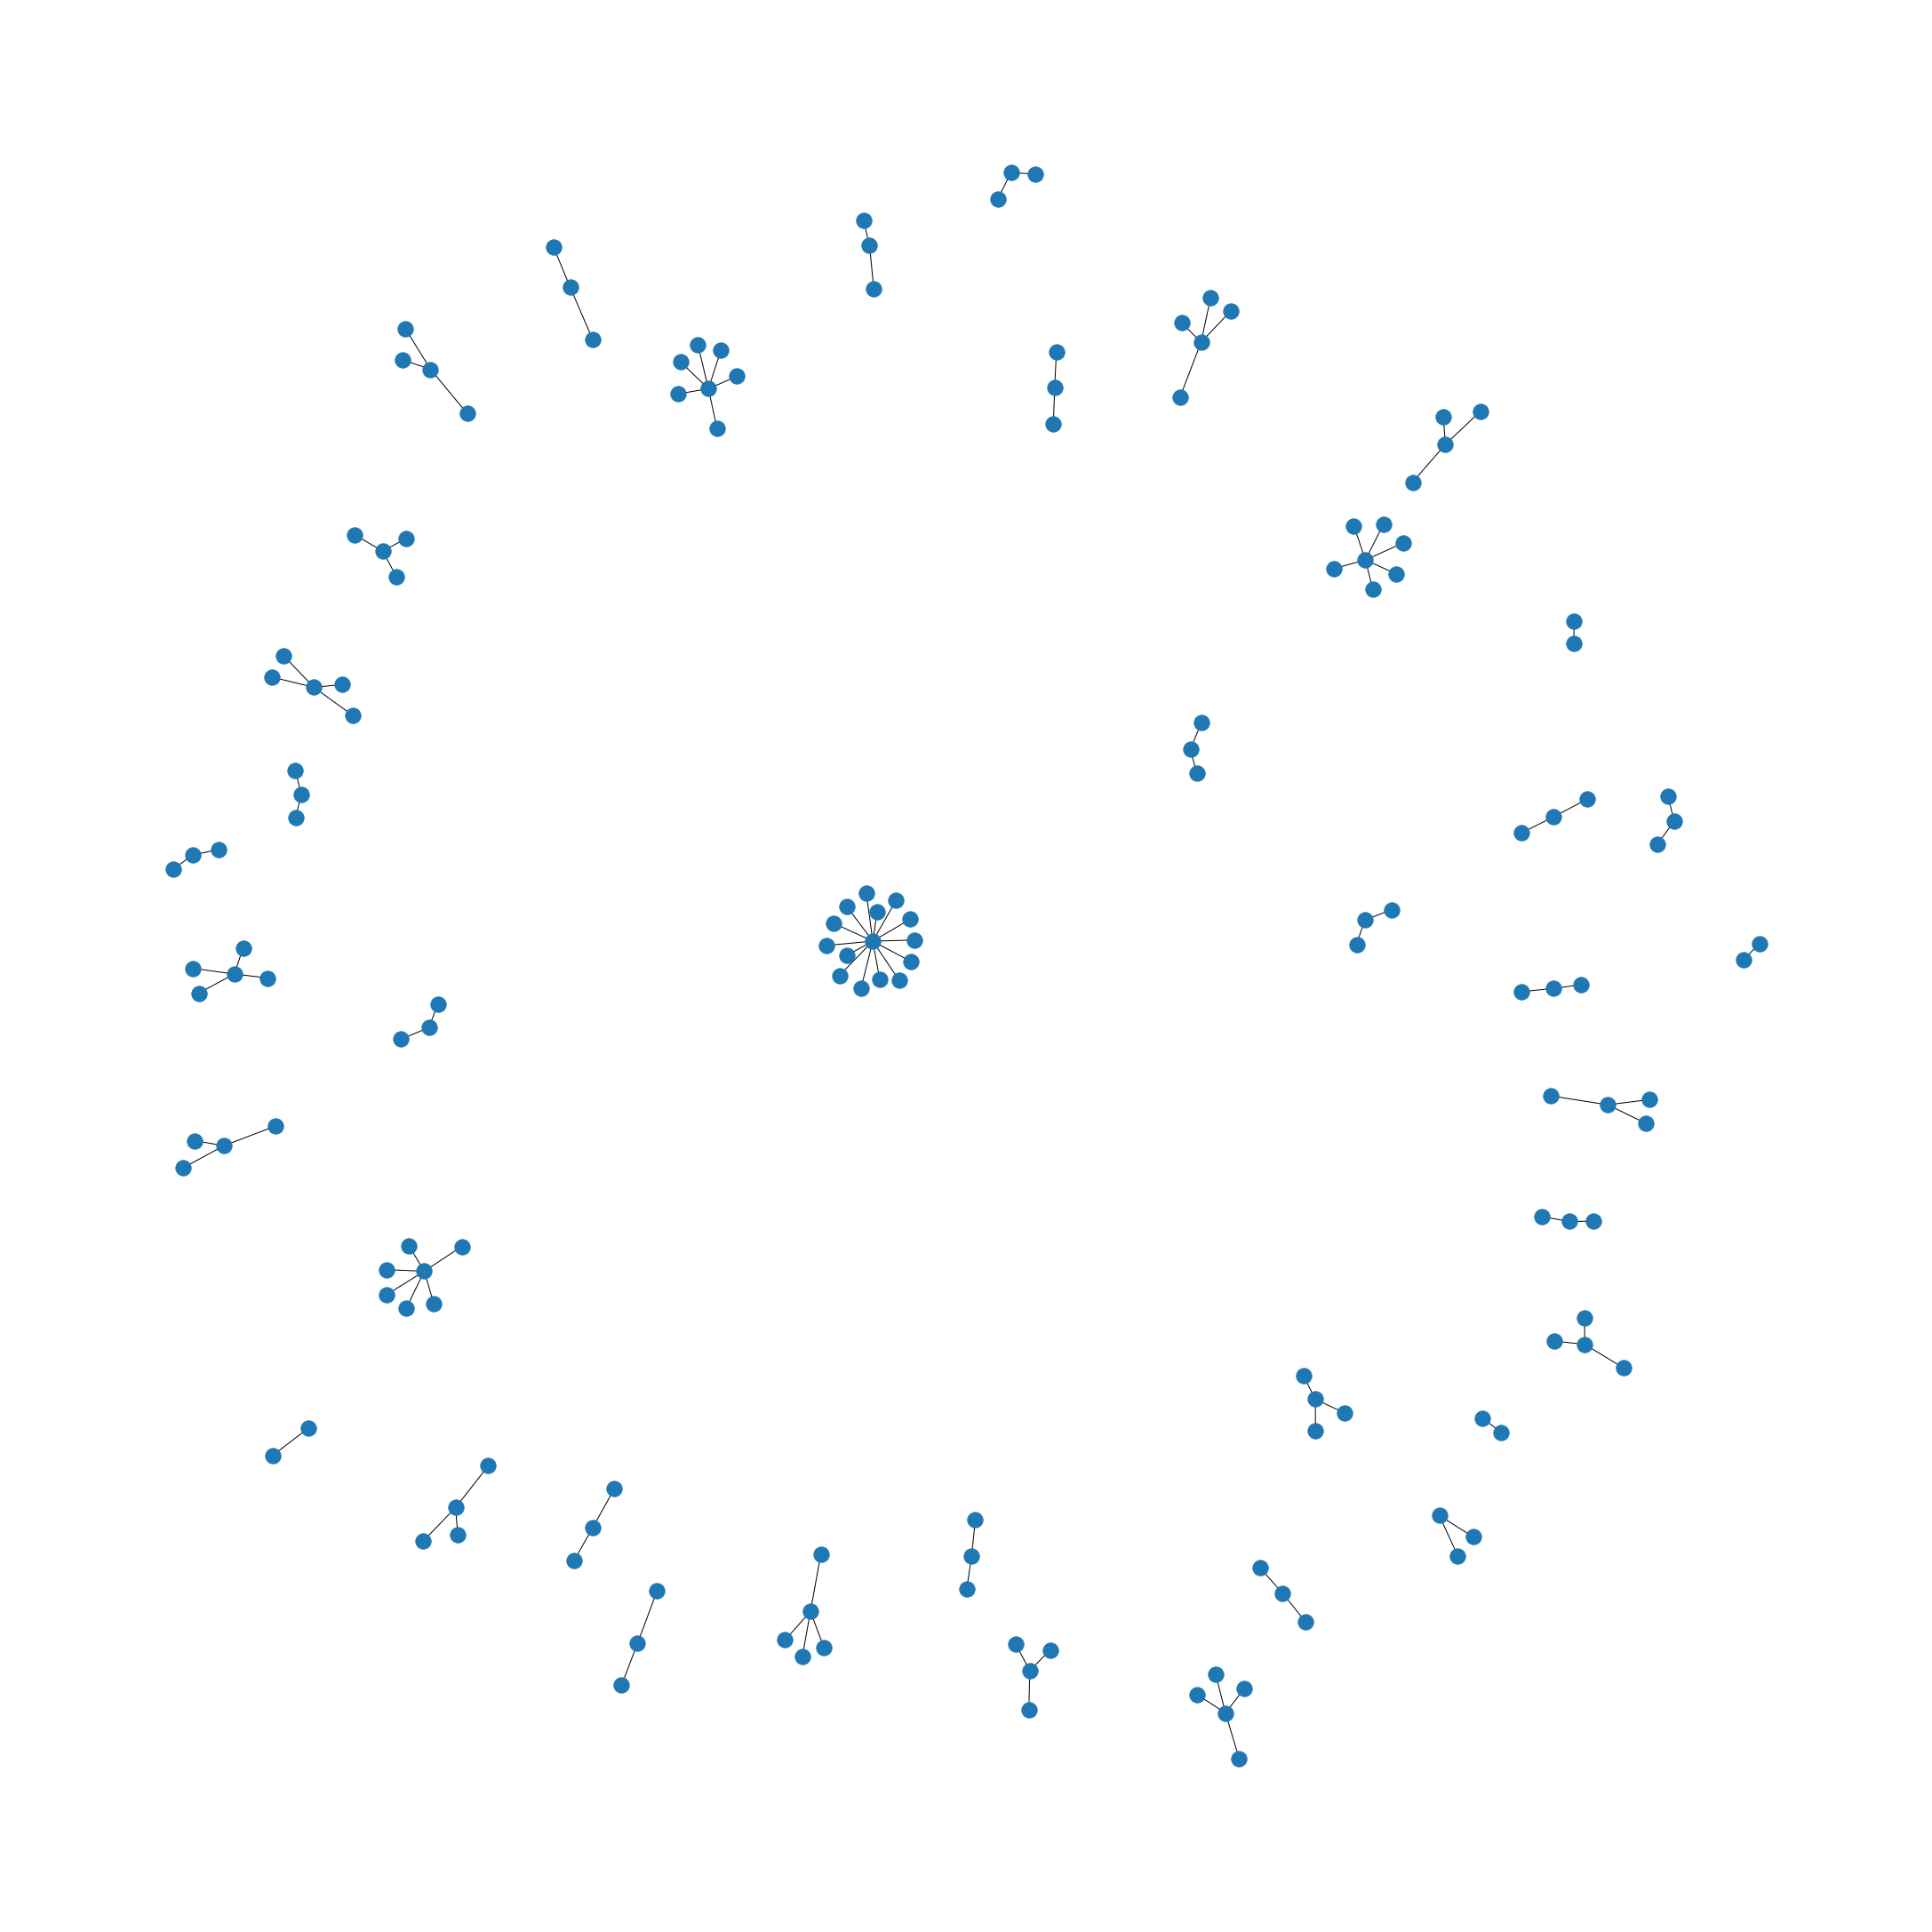

In [22]:
plt.figure(figsize=(30,30))
nx.draw(Y)
plt.show()




In [23]:
!cp /content/drive/MyDrive/FOC/Graph/MLN.py /content
!cp /content/drive/MyDrive/FOC/Graph/MLN_IO.py /content

Begin Network Summary


number of nodes of layer 0 : 27367
number of edges of layer 0: 44985
Number of Connected Component of layer 0   :6877 
Density of layer 0  : 0.000120132137820812
End network summary. Additional files are written in the same directory as the output file.
number of nodes of layer 1 : 76883
number of edges of layer 1: 82349
Number of Connected Component of layer 1   :2498 
Density of layer 1  : 2.7863350082362812e-05
End network summary. Additional files are written in the same directory as the output file.
number of nodes of layer 2 : 7348
number of edges of layer 2: 5587
Number of Connected Component of layer 2   :1776 
Density of layer 2  : 0.0002069805227882703
End network summary. Additional files are written in the same directory as the output file.


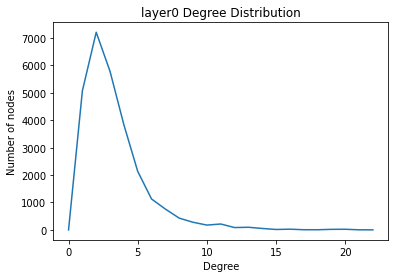

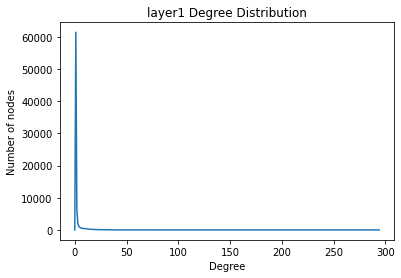

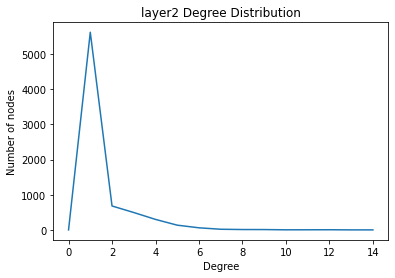

In [24]:
import networkx as nx
import MLN_IO as mlnio
import MLN as mlnlib
import statistics as stat
from collections import Counter
import csv
import matplotlib.pyplot as plt
import sys
import os



def plot_degree_histogram_v3(graph, layername, save_file_path):
    counts = Counter(d for n, d in graph.degree())
    degree_freq = [counts.get(i, 0) for i in range(max(counts) + 1)]
    #print(degree_freq)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot([k for k in range(0, len(degree_freq))], [v for v in degree_freq])
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    plt.title(f"{layername} Degree Distribution")
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    #plt.show() # blocking function. commented out to stop interrupting the exeuction of code in batch mode.
    fig.savefig(save_file_path+"_"+layername+"_deg_dist"+".png")

def degree_statistics(graph):
    degrees = [v for k, v in graph.degree()]
    #print(degrees)
    minimum = min(degrees)
    maximum = max(degrees)
    avg = stat.mean(degrees)
    stdev = stat.stdev(degrees)
    return minimum, maximum, avg, stdev, degrees

def network_sum():
    #datasetpath = sys.argv[1]
    #output_path = sys.argv[2]
    datasetpath = '/content/drive/MyDrive/FOC/Graph/input'
    output_path = '/content/drive/MyDrive/FOC/Graph/output.txt'
    #mln = read_PaRMAT_graphs(datasetpath, number_of_nodes_per_layer)
    mln = mlnio.read_mln(datasetpath)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, mode='w') as analysis_file:
            fieldnames = ['number_of_nodes', 'number_of_edges', 'density',
                          'number_of_connected_comp', 'connected_comps','diameter',
                          'min_degree','max_degree', 'avg_degree','std_dev_degree']
            writer = csv.DictWriter(analysis_file, fieldnames=fieldnames)
            writer.writeheader()

    print("Begin Network Summary\n\n")

    for i in range(mln.get_number_of_layers()):
        g1 = mln.get_nth_layer(i)
        number_of_nodes = g1.number_of_nodes()
        print(f"number of nodes of layer {i} : {number_of_nodes}")
        num_of_edges = g1.number_of_edges()
        print(f"number of edges of layer {i}: {num_of_edges}")
        connected_component_g1 = [len(c) for c in sorted(nx.connected_components(g1), key=len, reverse=True)]
        print(f"Number of Connected Component of layer {i}   :{len(connected_component_g1)} ")
        density_g1 = nx.density(g1)
        print(f"Density of layer {i}  : {density_g1}")

        diameter = -1
        if len(connected_component_g1) == 1:
            diameter = nx.diameter(g1)
            print(f"diameter of layer {i}: {diameter}") #diameter is only defined in nx if the whole graph is a singel connected component.

        #print([number_of_nodes, num_of_edges, density_g1, len(connected_component_g1)])
        plot_degree_histogram_v3(g1, f"layer{i}", output_path)

        minimum_deg_g1, maximum_deg_g1, avg_deg_g1, stdev_deg_g1, degrees_g1 = degree_statistics(g1)

        with open(output_path, mode='a') as analysis_file:
            fieldnames = ['number_of_nodes', 'number_of_edges', 'density',
                          'number_of_connected_comp', 'connected_comps','diameter',
                          'min_degree','max_degree', 'avg_degree','std_dev_degree']
            writer = csv.DictWriter(analysis_file, fieldnames=fieldnames)
            writer.writerow({'number_of_nodes':number_of_nodes, 'number_of_edges':num_of_edges, 'density':density_g1,
                          'number_of_connected_comp':len(connected_component_g1), 'connected_comps':connected_component_g1,'diameter': diameter,
                          'min_degree':minimum_deg_g1,'max_degree':maximum_deg_g1, 'avg_degree':avg_deg_g1,'std_dev_degree': stdev_deg_g1})

        print("End network summary. Additional files are written in the same directory as the output file.")
        # nx.draw(g1)



if __name__ == '__main__':
    network_sum()

